# Main

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Sharpe Ratio:0.4493343277913063

Max Drawdown: -46.99%
Peak Date: 2019-04-30 00:00:00
Trough Date: 2020-03-23 00:00:00


2025-10-13 16:29:02.282 
  command:

    streamlit run C:\Users\V\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-10-13 16:29:02.283 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-13 16:29:02.284 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-13 16:29:02.284 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-13 16:29:02.285 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-13 16:29:02.285 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-13 16:29:02.286 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-13 16:29:02.286 Thread 'MainThread': missing ScriptRunContext! This warning ca

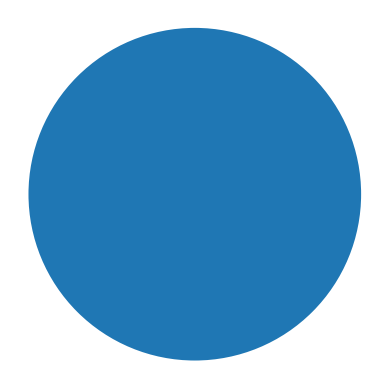

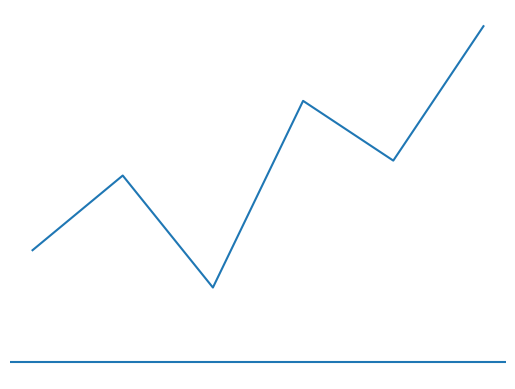

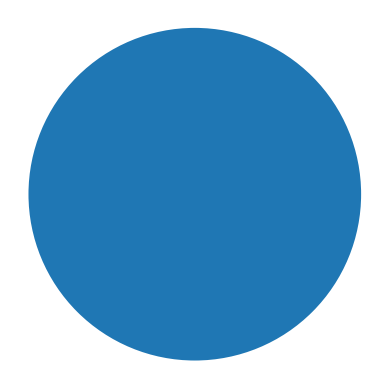

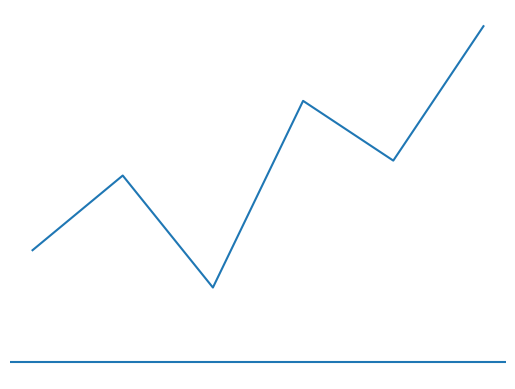

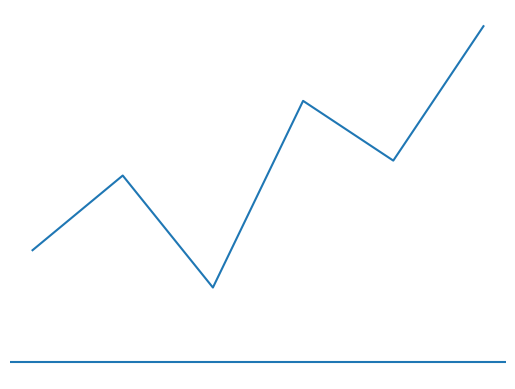

In [2]:
# Next steps
# TODO: Fix yahoo finance portfoio investmnets price to align with actual portfolio investments amounts
# TODO: Calculate single stock alpha and beta against chosen benchmark to compare with online sources
# TODO: Implement multiple equity investments and divestments in model
# TODO: Construct artificial MSCI Europe Small Cap and Mid Cap indices using available tickers



import os
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta

from data_preparation import prepare
from portfolio_model import generate_portfolio
from portfolio_model.analytics import alpha_beta
from scipy.stats import linregress

from portfolio_model.analytics import risk_analysis
from streamlit_app import TUICPortfolioApp

absolute_path = os.getcwd()

# Refresh portfolio investments
input_file = prepare.load_inputs(absolute_path)
portfolio_investments_dict = prepare.load_portfolio_investments(absolute_path, input_file)

# Get benchmarks
model_start_date = datetime(1990, 1, 1)

benchmarks_ticker = {
    # 'SMEA.DE': 'MSCI_Europe_Small_Cap', # Ticker not working
    # 'XEMD.PA': 'MSCI_Europe_Mid_Cap', # Ticker not working
    'IEUS': 'MSCI_Europe_Small_Cap',
    'EUMD.L': 'MSCI_Europe_Mid_Cap',
    'IWVL.L': 'MSCI_World_Value_Factor',  # iShares MSCI Europe Small Cap ETF (US)
    'EXW1.DE': 'Eurostoxx_50',
    'EXSA.DE': 'Eurostoxx_600',
    'SWDA.L': 'MSCI_World',
    'FEZ': 'Eurostoxx_50',          # SPDR EURO STOXX 50 ETF (US)
    'IEUR': 'Eurostoxx_600',        # iShares Europe ETF (US)
    'URTH': 'MSCI_World'            # iShares MSCI World ETF (US)
}

benchmarks_dict = prepare.load_benchmarks(absolute_path, benchmarks_ticker, model_start_date)

# Aggregate portfolio investments to portfolio level
portfolio_df = generate_portfolio.aggregate_portfolio_investments(portfolio_investments_dict, absolute_path)

# Calculate portfolio alpha and beta against chosen benchmark

#chosen_benchmark = 'EXSA.DE'

#for ticker, benchmark_name in benchmarks_ticker.items():
#    portfolio_alpha, portfolio_beta = alpha_beta.calculate_portfolio_alpha_beta(portfolio_df, benchmarks_dict, ticker)
#    annualized_alpha = (1+portfolio_alpha)**252 - 1  # Assuming daily returns
#    print(f"{benchmark_name}: Annualized Alpha: {annualized_alpha}, Portfolio Beta: {portfolio_beta}")

chosen_benchmark = 'EXSA.DE'
results = []
for ticker, benchmark_name in benchmarks_ticker.items():
    alpha, beta = alpha_beta.calculate_portfolio_alpha_beta(portfolio_df, benchmarks_dict, ticker)
    annualized_alpha = (1 + alpha) ** 252 - 1
    results.append({"Benchmark": benchmark_name, "Alpha (ann.)": annualized_alpha, "Beta": beta})


sharpe_ratio = risk_analysis.calculate_sharpe_ratio(portfolio_df, 0.02, 252)
print(f"Sharpe Ratio:{sharpe_ratio}")

sortino_ratio = risk_analysis.calculate_sortino_ratio(portfolio_df, 0.02, 252)
print(f"Sortino Ratio:{sortino_ratio}")


max_dd_info = risk_analysis.calculate_max_drawdown(portfolio_df)
print(f"\nMax Drawdown: {max_dd_info['max_drawdown_pct']:.2f}%")
print(f"Peak Date: {max_dd_info['peak_date']}")
print(f"Trough Date: {max_dd_info['trough_date']}")
